In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set()
import requests
import json
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.dates import MO
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [2]:
# sometimes this API is down 
URL = 'https://covidtracking.com/api/states/daily'
r = requests.get(URL)
sd = pd.read_json(json.dumps(r.json()))

# convert floats to dates
sd['date'] = pd.to_datetime(sd['date'], format='%Y%m%d')
# replace zeros with nulls for cleaner plots
data_threshold_cases = 1
sd.loc[sd.loc[:, 'positive'] < data_threshold_cases, 'positive'] = np.nan
state_data = sd
state_data.head()

,date,state,positive,negative,pending,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,onVentilatorCurrently,...,hospitalized,total,totalTestResults,posNeg,fips,deathIncrease,hospitalizedIncrease,negativeIncrease,positiveIncrease,totalTestResultsIncrease
0,2020-04-02,AK,143.0,4879.0,NaN,NaN,9.0,NaN,NaN,NaN,...,9.0,5022,5022,5022,2,0.0,0.0,409.0,10.0,419.0
1,2020-04-02,AL,1233.0,7503.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,8736,8736,8736,1,6.0,0.0,806.0,156.0,962.0
2,2020-04-02,AR,643.0,7880.0,NaN,66.0,NaN,NaN,NaN,23.0,...,NaN,8523,8523,8523,5,2.0,0.0,526.0,59.0,585.0
3,2020-04-02,AS,NaN,20.0,6.0,NaN,NaN,NaN,NaN,NaN,...,NaN,26,20,20,60,0.0,0.0,0.0,0.0,0.0
4,2020-04-02,AZ,1598.0,21111.0,NaN,NaN,228.0,NaN,83.0,NaN,...,228.0,22709,22709,22709,4,3.0,79.0,1466.0,185.0,1651.0


[]

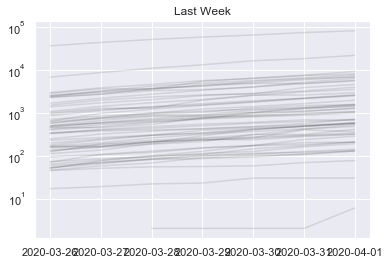

In [3]:
# overlay all plots for one week and see nothing
fig, ax = plt.subplots()
for state, data in state_data.groupby('state'):
    # set date index
    data = data.set_index('date')
    # sort index
    data = data.sort_index()
    # discard older data
    data = data[-7:]
    # plot
    ax.plot(data['positive'], color='black', alpha=0.1)
    
ax.set_yscale('log')
ax.set_title('Last Week')
plt.plot()

[]

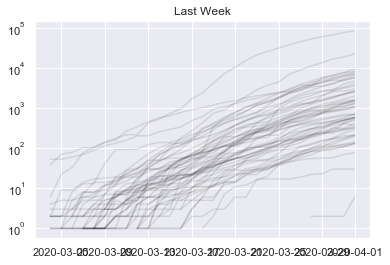

In [4]:
# overlay all plots for one week and see nothing
fig, ax = plt.subplots()
for state, data in state_data.groupby('state'):
    # set date index
    data = data.set_index('date')
    # sort index
    data = data.sort_index()
    # plot
    ax.plot(data['positive'], color='black', alpha=0.1)
    
ax.set_yscale('log')
ax.set_title('Last Week')
plt.plot()

[]

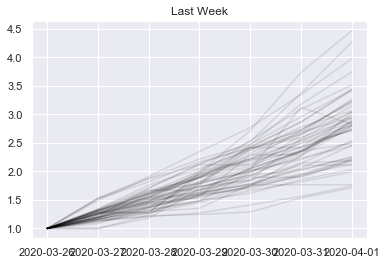

In [5]:
# normalize all to one and look at one week growth
fig, ax = plt.subplots()
for state, data in state_data.groupby('state'):
    # set date index
    data = data.set_index('date')
    # sort index
    data = data.sort_index()
    # discard older data
    data = data[-7:]
    data = data['positive']/data['positive'].iloc[0]
    # plot
    ax.plot(data, color='black', alpha=0.1)
    
#ax.set_yscale('log')
ax.set_title('Last Week')
plt.plot()

In [6]:
# list doubling times
data_list = []
for state, data in state_data.groupby('state'):
    # set date index
    data = data.set_index('date')
    # sort index
    data = data.sort_index()
    # discard older data
    days_data = 7
    data = data[-days_data:]
    fit_x = np.arange(0, days_data, 1)
    beta, log_intercept = np.polyfit(fit_x, np.log(data['positive']), 1)
    data_list.append({'state':state, 'beta':beta, 'doubling':np.log(2)/beta})
    
    #data_list.append({'state':state, 'rate':data.iloc[-1]['positive']/data.iloc[0]['positive']})
    
pd.DataFrame(data_list).sort_values('doubling')
#data_list

,state,beta,doubling
42,PR,0.259259,2.673574
43,RI,0.234455,2.956416
7,CT,0.222493,3.115369
15,ID,0.222328,3.117671
17,IN,0.217514,3.186682
54,WV,0.205250,3.377086
41,PA,0.202322,3.425966
24,MI,0.199805,3.469125
22,MD,0.198957,3.483910
34,NJ,0.193839,3.575889


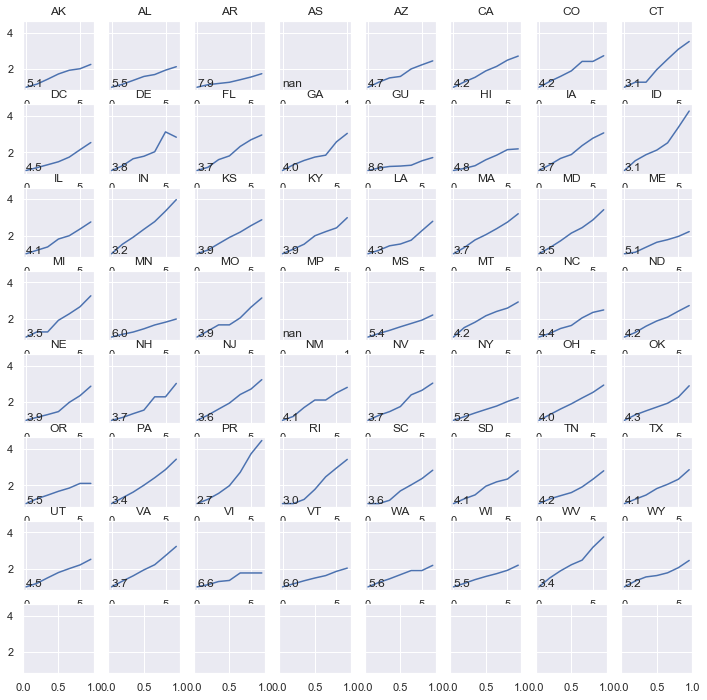

In [8]:
# list doubling times and graph
rows = 8
cols = 8
fig, ax = plt.subplots(rows, cols, figsize=(12,12), sharey=True)
data_list = []
i = 0
for state, data in state_data.groupby('state'):
    # set date index
    data = data.set_index('date')
    # sort index
    data = data.sort_index()
    # discard older data
    days_data = 7
    data = data[-days_data:]
    fit_x = np.arange(0, days_data, 1)
    beta, log_intercept = np.polyfit(fit_x, np.log(data['positive']), 1)
    ax[i//8][i%8].plot(data['positive'].values/data['positive'].iloc[0])
    ax[i//8][i%8].set_title(state)
    ax[i//8][i%8].text(0,1,'{:.1f}'.format(np.log(2)/beta))
    data_list.append({'state':state, 'beta':beta, 'doubling':np.log(2)/beta})
    i = i + 1
    #data_list.append({'state':state, 'rate':data.iloc[-1]['positive']/data.iloc[0]['positive']})
    
#pd.DataFrame(data_list).sort_values('doubling')
#data_list

In [78]:
ax[1//8][1%8]

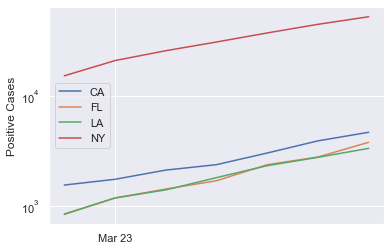

In [24]:
# set start of week date ticks on plot
def format_plots():
    fig, ax = plt.subplots()
    loc = mdates.WeekdayLocator(byweekday=MO)
    ax.xaxis.set_major_locator(loc)
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
    ax.set_yscale('log')
    ax.set_ylabel('Positive Cases')
    return fig, ax

# show all the states overlaid
fig, ax = format_plots()
for group in state_data.groupby('state'):
    if group[0] in ['CA', 'NY', 'LA', 'FL']:
        data = group[1].sort_values('date')
        #print(data)
        ax.plot('date', 'positive', data=data[-7:], label=group[0])
ax.legend()
plt.show()

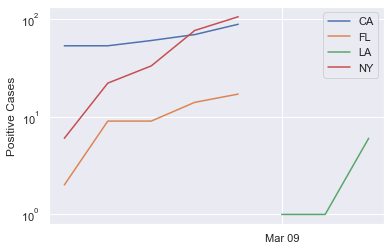

In [10]:
# filter individual states from data and plot
fig, ax = format_plots()
for state, data in state_data.groupby('state'):
    if state in ['CA', 'NY', 'LA', 'FL']:
        ax.plot('date', 'positive', data=data[-5:], label=state)

ax.legend()
plt.show() 

In [5]:
populations = pd.read_excel('state-populations.xlsx', index_col='State')

FileNotFoundError: [Errno 2] No such file or directory: 'state-populations.xlsx'

NameError: name 'populations' is not defined

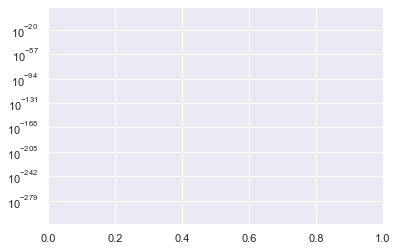

In [6]:
# show all the states overlaid
threshold = 10
fig, ax = plt.subplots()
ax.set_yscale('log')
for label, data in state_data.groupby('state'):
    #if label not in ['AS', 'GU', 'MP', 'VI']:
    if label in ['CA', 'NY', 'TX']:
        td = data
        td.index = td['date']
        td = td.sort_index()
        counts = td['positive']
        #counts = td['positive'][td['positive']>threshold]
        pop = populations.loc[label]['population']
        counts = counts / pop
        counts = counts[counts > 1e-5]
        #print(counts)
        ax.plot(counts.values, label=label)
ax.legend()
plt.show()

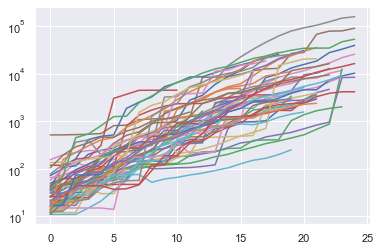

In [7]:
# testing per capita
# show all the states overlaid
threshold = 10
fig, ax = plt.subplots()
ax.set_yscale('log')
for label, data in state_data.groupby('state'):
    td = data
    td.index = td['date']
    td = td.sort_index()
    counts = td['total'][td['total']>threshold]
    ax.plot(counts.values)
plt.show()

NameError: name 'populations' is not defined

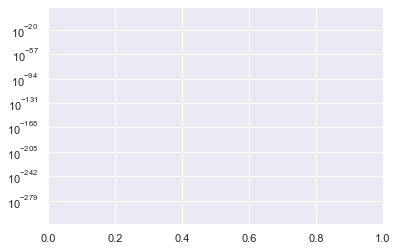

In [8]:
# show all the states overlaid
threshold = 10
fig, ax = plt.subplots()
ax.set_yscale('log')
for label, data in state_data.groupby('state'):
    #if label not in ['AS', 'GU', 'MP', 'VI']:
    if label in ['CA', 'NY', 'TX']:
        td = data
        td.index = td['date']
        td = td.sort_index()
        counts = td['death']
        #counts = td['positive'][td['positive']>threshold]
        pop = populations.loc[label]['population']
        #counts = counts / pop
        #counts = counts[counts > 1e-5]
        #print(counts)
        ax.plot(counts.values, label=label)
ax.legend()
plt.show()

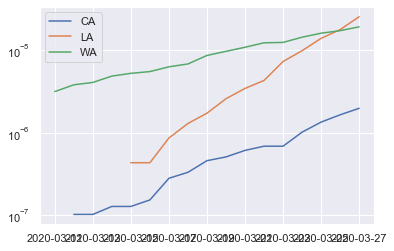

In [49]:
# normalize deaths by population
# TODO: fix ylabel
fig, ax = plt.subplots()
for state, data in state_data.groupby('state'):
    if state in ['CA', 'WA', 'LA']:
        data.index = data['date']
        data = data.sort_index()
        counts = data['death']
        #ax.plot('date', 'death', data=data, label=state)
        counts = counts/populations.loc[state]['population']
        ax.plot(counts, label=state)

ax.legend()
ax.set_yscale('log')
plt.show() 

In [38]:
#state_data[state_data['state']=='WA']
populations.loc['WA']['population']

7614893

In [44]:
state_data.index = state_data['date']
state_data[state_data['state']=='WA']['death'] / populations.loc['WA']['population'] * 1e5

date
2020-03-27    1.930428
2020-03-26    1.733445
2020-03-25    1.615256
2020-03-24    1.444538
2020-03-23    1.247555
2020-03-22    1.234423
2020-03-21    1.089969
2020-03-20    0.971780
2020-03-19    0.866723
2020-03-18    0.682872
2020-03-17    0.630344
2020-03-16    0.551551
2020-03-15    0.525286
2020-03-14    0.485890
2020-03-13    0.407097
2020-03-12    0.380833
2020-03-11    0.315172
2020-03-10         NaN
2020-03-09         NaN
2020-03-08         NaN
2020-03-07         NaN
2020-03-06         NaN
2020-03-05         NaN
2020-03-04         NaN
Name: death, dtype: float64